# Investigate Hotel Business using Data Visualization

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 50)

## Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Mini Project/Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
109783,City Hotel,0,59,2019,June,16,16,1,0,2,0.0,0,No Meal,Kabupaten Garut,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,108.0,0,0,Check-Out
9466,Resort Hotel,1,128,2018,February,49,3,0,1,2,0.0,0,Dinner,Kota Denpasar,Groups,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Family,64.0,0,0,Canceled
20067,Resort Hotel,0,14,2018,March,3,12,0,4,2,0.0,0,Dinner,Kota Bengkulu,Online TA,TA/TO,0,0,0,0,No Deposit,242.0,NaN,0,Personal,74.8,0,1,Check-Out
4157,Resort Hotel,1,26,2018,April,8,20,0,1,2,1.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,63.0,0,1,Canceled
57769,City Hotel,1,315,2018,November,40,30,1,2,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,31.0,NaN,69,Personal,160.0,0,0,Canceled


## 1. Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Kesimpulan :
1. Data terdiri dari dari 29 kolom dan 119390 baris.
2. Terdapat beberapa kolom seperti 'children', 'city', 'agent' dan 'company' yang memiliki Data Null yang harus dibersihkan terlebih dahulu.
3. Untuk kolom 'children' lebih baik diubah tipe datanya menjadi int & selebihnya tipe data untuk setiap kolom sudah sesuai.
4. Karena pada kolom 'children' terdapat data Missing Value/Null maka tipe data kolom tersebut tidak bisa diubah menjadi int sebelum diatasi terlebih dahulu Missing Value/Null dari kolom tersebut.

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Handling Missing Value

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

#### Children

In [7]:
df['children'].fillna(df['children'].mode()[0], inplace = True)

In [8]:
df['children'] = df['children'].astype('int64')

#### City

In [9]:
df['city'].fillna(df['city'].mode()[0], inplace = True)

#### Agent

In [10]:
df['agent'].fillna(df['agent'].median(), inplace=True)

#### Company

Lebih dari 90 % Data pada kolom 'Company' merupakan Data Missing Value/Null, maka kolom 'Company' akan di drop.

In [11]:
df.drop('company', axis=1, inplace=True)

#### Check Missing Value

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Handling Invalid Value

In [13]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Pada kolom 'meal' terdapat data bernilai 'Undefined' dimana pada umumnya Hotel Meal Plan tidak memiliki kategori 'Undefined'. Data 'Undefined' pada kolom 'meal' akan diganti dengan 'No Meal'.

In [14]:
df['meal'].replace({'Undefined' : 'No Meal'}, inplace=True)

In [15]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Handling Unnecessary Data

#### Total Guest for Each Reservation

In [16]:
df_preprocessing = df.copy()

In [17]:
df_preprocessing["guests"] = df_preprocessing["adults"]+df_preprocessing["children"]+df_preprocessing["babies"]
print("Data with 0 guest: {0} out of {1} all data".format(df_preprocessing[df_preprocessing["guests"] == 0].shape[0], df.shape[0]))

Data with 0 guest: 180 out of 119390 all data


Terlihat terdapat data guest bernilai 0, maka kita perlu membuang data tersebut.

In [18]:
df_preprocessing = df_preprocessing[df_preprocessing["guests"] > 0]
df_preprocessing.shape

(119210, 29)

#### February Date Data

In [19]:
temp = df_preprocessing.groupby('arrival_date_month')['arrival_date_day_of_month'].unique().reset_index()
temp1 = temp[temp['arrival_date_month'] == 'February']
temp1['arrival_date_day_of_month'].tolist()

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  9, 16])]

Terlihat pada bulan Februari terdapat tanggal 29, 30 & 31 dimana seharusnya untuk bulan Februari pada tahun 2017 - 2019 hanya sampai tanggal 28.

In [20]:
df_preprocessing = df_preprocessing[~((df_preprocessing['arrival_date_day_of_month'].isin([29,30,31])) & (df_preprocessing['arrival_date_month']=='February'))]

In [21]:
temp = df_preprocessing.groupby('arrival_date_month')['arrival_date_day_of_month'].unique().reset_index()
temp1 = temp[temp['arrival_date_month'] == 'February']
temp1['arrival_date_day_of_month'].tolist()

[array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28,  9, 16])]

In [22]:
df_preprocessing.shape

(118220, 29)

## 2. Monthly Hotel Booking Analysis Based on Hotel Type

### Agregration Table

In [23]:
df_grouped = df_preprocessing.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df_grouped.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking']
df_grouped.sort_values('unique_year', ascending = False)

,hotel_type,arrival_month,unique_year,num_booking
23,Resort Hotel,September,3,4573
22,Resort Hotel,October,3,4894
10,City Hotel,October,3,8967
11,City Hotel,September,3,8071
13,Resort Hotel,August,2,3044
21,Resort Hotel,November,2,3108
20,Resort Hotel,May,2,3334
19,Resort Hotel,March,2,2191
18,Resort Hotel,June,2,3609
17,Resort Hotel,July,2,3559


Kesimpulan :
- Terlihat untuk data Bulan September dan Oktober terdapat data untuk 3 tahun, sedangkan untuk bulan lainnya hanya terdapat data untuk 2 tahun saja. Maka kita perlu melakukan normalisasi data sehingga perbandingan datanya lebih sesuai.


### Monthly Data Normalization

Akan dilakukan Normalisasi Data dengan mengambil rata - rata jumlah booking untuk setiap bulannya.

In [24]:
df_grouped['avg_num_booking'] = round(df_grouped['num_booking']/df_grouped['unique_year'])
df_grouped

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,3513,1756.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


### Sorting by Month

In [25]:
ordered_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_sorted = df_grouped.copy()
df_sorted["month"] = df_sorted["arrival_month"].str[:3] # mengambil 3 huruf terdepan dari setiap bulan
df_sorted["month"] = pd.Categorical(df_sorted["month"], categories=ordered_months, ordered=True) # mengurutkan bulan

df_sorted

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,3513,1756.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


### Data Visualization

In [26]:
import matplotlib.style as style

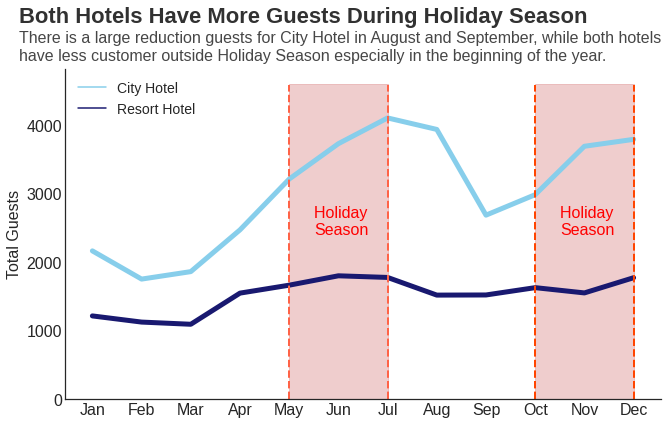

In [27]:
style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.lineplot(data=df_sorted, x = 'month', y = 'avg_num_booking', hue = 'hotel_type', palette = ['skyblue','midnightblue'], 
                  linewidth = 5)
sns.despine()
ax.set(xlabel=None)

plt.axvline(4, color='tomato', linestyle='--', linewidth=2, ymax=0.95)
plt.axvline(6, color='tomato', linestyle='--', linewidth=2, ymax=0.95)
plt.text(x=4.5, y=2400, s='Holiday \nSeason', fontsize=16, color='red')
plt.stackplot(np.arange(4,7,1), [[4600]], color='indianred', alpha=0.3)

plt.axvline(9, color='orangered', linestyle='--', linewidth=2, ymax=0.95)
plt.axvline(11, color='orangered', linestyle='--', linewidth=2, ymax=0.95)
plt.text(x=9.5, y=2400, s='Holiday \nSeason', fontsize=16, color='red')
plt.stackplot(np.arange(9,12,1), [[4600]], color='indianred', alpha=0.3)

plt.tick_params(axis='both', which = 'major', labelsize=16)
plt.ylabel('Total Guests', fontsize = 16)

legend = plt.legend(fontsize = 14, loc="upper left")
legend.get_frame().set_alpha(0.2)

# Adding a title, a subtitle and text
ax.text(x = -1.5, y = 5500, s = "Both Hotels Have More Guests During Holiday Season",
               fontsize = 22, fontweight = 'bold', alpha = .95)
ax.text(x = -1.5, y = 4950,
               s = 'There is a large reduction guests for City Hotel in August and September, while both hotels \nhave less customer outside Holiday Season especially in the beginning of the year.',
              fontsize = 16, alpha = .85)

plt.tight_layout()
plt.savefig('city hotel.png', dpi=200);
plt.show()

## 3. Impact Analysis of Stay Duration on Hotel Booking Cancelation Rate

In [28]:
df2 = df_preprocessing.copy()

df2['stay_duration'] = df2["stays_in_weekend_nights"] + df2["stays_in_weekdays_nights"]

In [29]:
df2['stay_duration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12,
       18, 46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27,
       60, 69, 35, 45, 38, 24, 48, 34])

In [30]:
df2[df2['stay_duration']==0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guests,stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,2,0
167,Resort Hotel,0,111,2017,September,28,6,0,0,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,0.0,0,2,Check-Out,2,0
168,Resort Hotel,0,0,2017,September,28,6,0,0,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,250.0,0,Personal,0.0,0,0,Check-Out,1,0
196,Resort Hotel,0,8,2017,September,28,7,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,0.0,0,1,Check-Out,2,0


Terlihat terdapat data Stay Duration bernilai 0 dimana seharusnya paling minimal sekali tamu hotel menginap selama 1 malam. Maka kita perlu menghilangkan data tersebut terlebih dahulu.

In [31]:
df2 = df2[df2['stay_duration']!=0]

In [32]:
df2['stay_duration'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 14, 15, 10, 11,  8,  9, 21, 13, 12, 18,
       46, 28, 17, 19, 22, 23, 16, 29, 42, 20, 26, 33, 30, 56, 25, 27, 60,
       69, 35, 45, 38, 24, 48, 34])

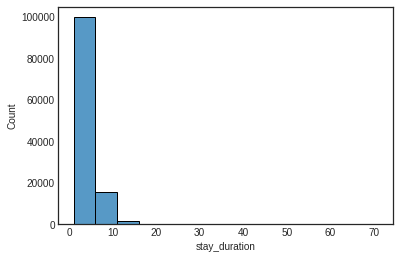

In [33]:
sns.histplot(data=df2, x='stay_duration',binwidth=5)

Terlihat berdasarkan grafik histogram bahwa persebaran datanya right-skewed. Oleh karena itu kita perlu mengelompokkan data sehinggan persebarannya menjadi lebih merata. Data akan dikelompokkan dengan ketentuan :
- Stay Duration mencapai 2 minggu (1 - 14 malam) akan diisi sesuai dengan nilai Stay Duration tamu tersebut.
- Stay Duration dari 15 - 21 malam akan diisi dengan nilai 15.
- Stay Duration lebih dari 21 malam akan diisi dengan nilai 21.

In [34]:
df2['stay_category'] = np.where(df2['stay_duration'] >21, 21, (np.where(df2['stay_duration'] > 14, 15, df2['stay_duration'])))

In [35]:
df2_group = df2.groupby(['hotel','is_canceled','stay_category'])['arrival_date_month'].count().reset_index(name='num_bookings')
df2_pivot = df2_group.pivot_table(index=(['hotel','stay_category']), columns='is_canceled', values='num_bookings').reset_index()
df2_pivot.columns = ['hotel_type','stay_category', 'not_canceled', 'canceled']
df2_pivot['all_bookings'] = df2_pivot['not_canceled'] + df2_pivot['canceled']
df2_pivot['percentage_canceled'] = round((df2_pivot['canceled']*100.0)/df2_pivot['all_bookings'],2)

df2_pivot

,hotel_type,stay_category,not_canceled,canceled,all_bookings,percentage_canceled
0,City Hotel,1,9117,4091,13208,30.97
1,City Hotel,2,10923,10391,21314,48.75
2,City Hotel,3,11767,9423,21190,44.47
3,City Hotel,4,7619,4795,12414,38.63
4,City Hotel,5,3177,1699,4876,34.84
5,City Hotel,6,1103,935,2038,45.88
6,City Hotel,7,1239,803,2042,39.32
7,City Hotel,8,205,172,377,45.62
8,City Hotel,9,118,93,211,44.08
9,City Hotel,10,80,116,196,59.18


Data Visualization pada bagian ini adalah untuk membandingkan durasi menginap pelanggan terhadap 2 tipe hotel, sehingga akan digunakan diagram batang (Bar Chart) untk perbandingan tersebut. Selain itu, kita juga akan melihat pengaruh durasi menginap terhadap tingkat pembatalan pesanan hotel, tren tersebut akan kita visualisasikan menggunakan diagram garis (Line Chart).

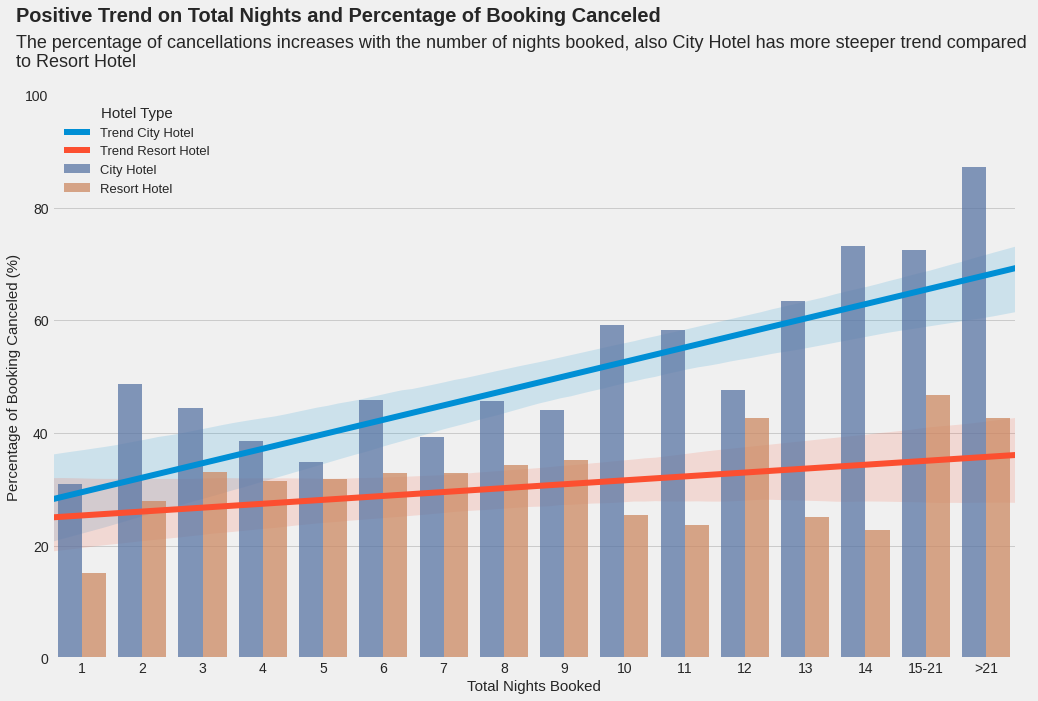

In [36]:
style.use('fivethirtyeight')

plt.figure(figsize=(15,10))
color = sns.color_palette("deep")
sns.barplot(x='stay_category', y='percentage_canceled', hue='hotel_type', data=df2_pivot, palette=color, alpha=0.75)
sns.regplot(x='stay_category', y='percentage_canceled', data=df2_pivot[df2_pivot['hotel_type'] == 'City Hotel'], scatter=False, truncate=False, label='Trend City Hotel')
sns.regplot(x='stay_category', y='percentage_canceled', data=df2_pivot[df2_pivot['hotel_type'] == 'Resort Hotel'], scatter=False, truncate=False, label='Trend Resort Hotel')

plt.tick_params(axis='both', which='major', labelsize=14) 
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xticks(range(0,17,1), labels=[str(x+1) for x in range(0,14,1)]+["15-21",">21"]) # mengatur customized-label pada x-axis
plt.xlabel('Total Nights Booked', fontsize=15) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) # mengatur title pada y-axis
plt.ylim(0, 100) # membatasi y axis
plt.xlim(-0.5, 15.5) # membatasi x axis

plt.text(x=-1.1, y=113, s="Positive Trend on Total Nights and Percentage of Booking Canceled", 
         fontsize=20, fontweight='bold') 
plt.text(x=-1.1, y=105, s="The percentage of cancellations increases with the number of nights booked, also City Hotel has more steeper trend compared \nto Resort Hotel", 
         fontsize=18) 

plt.tight_layout() 
plt.savefig('cancelation trend.png', dpi=200)

## 4. Impact Analysis of Lead Time on Hotel Booking Cancelation Rate

In [37]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Akan dibuat kolom baru berisi data kategori dari nilai lead_time setiap customer dengan mengelompokkanya berdasarkan interval setiap 30 hari dengan ketentuan :
- 0 : Lead time antara 1 - 30 hari.
- 1 : Lead time antara 31 - 60 hari.
- 2 : Lead time antara 61 - 90 hari.
- 3 : Lead time antara 91 - 120 hari.
- 4 : Lead time antara 121 - 150 hari.
- 5 : Lead time antara 151 - 180 hari.
- 6 : Lead time lebih dari 180 hari.

In [38]:
def segment(x) :
  value = x['lead_time']
  if value in range(0, 31, 1):
    segment = 0
  elif value in range(31, 61, 1) :
    segment  = 1
  elif value in range(61,91,1) :
    segment = 2
  elif value in range(91,121,1) :
    segment = 3
  elif value in range(121,151,1) :
    segment = 4
  elif value in range(151,181,1) :
    segment = 5
  elif value > 180 :
    segment = 6
  return segment

In [39]:
df3 = df_preprocessing.copy()
df3['booking_category'] = df3.apply(lambda x : segment(x), axis = 1)

In [40]:
df3_group = df3.groupby(['hotel','is_canceled','booking_category'])['arrival_date_month'].count().reset_index(name='num_bookings')
df3_pivot = df3_group.pivot_table(index=(['hotel','booking_category']), columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0,17929,5133,23062,22.257393
1,City Hotel,1,7210,4587,11797,38.882767
2,City Hotel,2,5171,3668,8839,41.497907
3,City Hotel,3,3919,3478,7397,47.019062
4,City Hotel,4,3047,2476,5523,44.830708


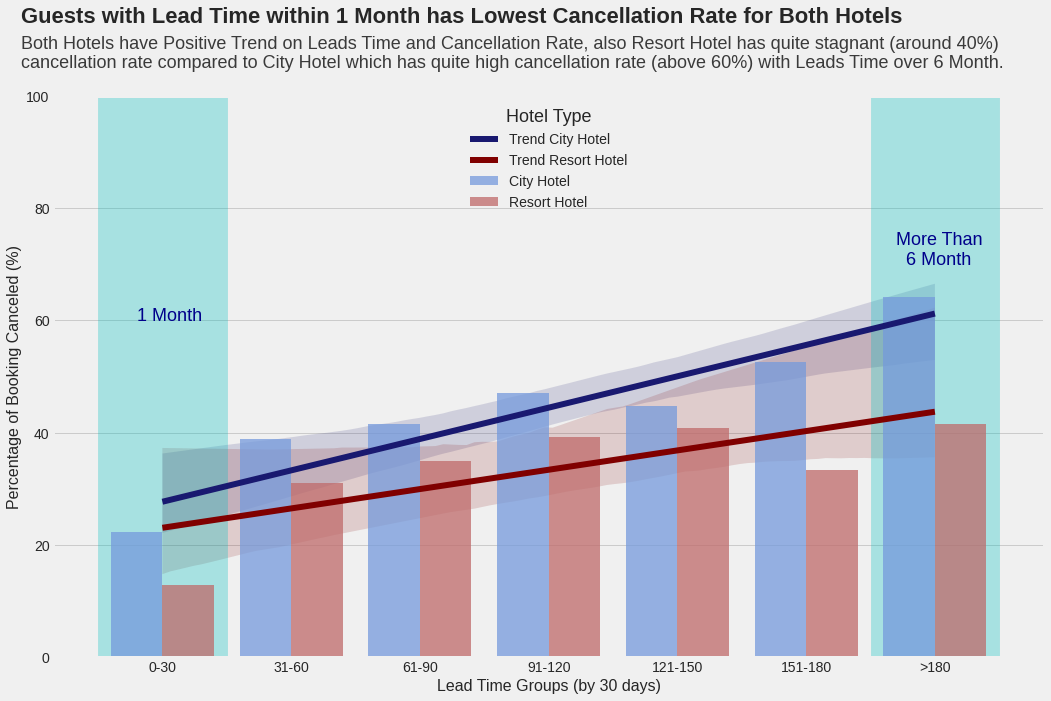

In [41]:
style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

sns.regplot(x='lead_time_group', y='pct_canceled', data=df3_pivot[df3_pivot['hotel_type'] == 'City Hotel'], scatter=False, color='midnightblue',
            label='Trend City Hotel')
sns.regplot(x='lead_time_group', y='pct_canceled', data=df3_pivot[df3_pivot['hotel_type'] == 'Resort Hotel'], scatter=False,color='maroon',
            label='Trend Resort Hotel')
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df3_pivot, palette=['cornflowerblue','indianred'], alpha=0.75)

plt.tick_params(axis='both', which = 'major', labelsize=14)
plt.xticks([0,1,2,3,4,5,6],['0-30','31-60','61-90','91-120','121-150','151-180','>180'])
plt.xlabel('Lead Time Groups (by 30 days)', fontsize=16)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=16)
plt.ylim(0, 100)

plt.legend(title='Hotel Type', title_fontsize=18, prop={'size':14}, loc=9)

plt.text(x=-0.2, y=60, s='1 Month', fontsize=18, color='darkblue')
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='c', alpha=0.3)

plt.text(x=5.7, y=70, s='More Than \n  6 Month', fontsize=18, color='darkblue')
plt.stackplot(np.arange(5.5,7.5,1), [[100]], color='c', alpha=0.3)

# Adding a title, a subtitle and text
plt.text(x = -1.1, y = 113, s = 'Guests with Lead Time within 1 Month has Lowest Cancellation Rate for Both Hotels',
               fontsize = 22, weight = 'bold')
plt.text(x = -1.1, y = 105,
               s = 'Both Hotels have Positive Trend on Leads Time and Cancellation Rate, also Resort Hotel has quite stagnant (around 40%) \ncancellation rate compared to City Hotel which has quite high cancellation rate (above 60%) with Leads Time over 6 Month.',
              fontsize = 18, alpha = 0.9)

plt.tight_layout()
plt.savefig('booking time.png', dpi=200);